In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import jax
jax.config.update('jax_enable_x64', True)

import jax.numpy as jnp
import matplotlib.pyplot as plt
import tornadox
from tqdm import trange

from pof.solve import get_solver_iterator

In [45]:
ivp = tornadox.ivp.vanderpol_julia(stiffness_constant=1e0, tmax=8)
ylims = (-3, 3)
dt = 1e-3
order = 3

In [46]:
init_state, refine, project = get_solver_iterator(ivp, order=order, dt=dt, parallel=True)
refine_jit = jax.jit(refine)

In [47]:
%%time 
refine_jit(init_state)
None

CPU times: user 9min 5s, sys: 4.6 s, total: 9min 10s
Wall time: 8min 21s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:02<00:00,  7.48it/s]


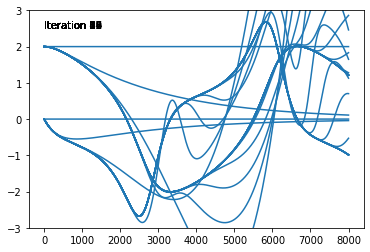

In [48]:
from celluloid import Camera
fig = plt.figure()
camera = Camera(fig)

states = init_state
#plt.plot(times, ekf_states.mean[:, 0::order+1], "--", color="black")
plt.plot(project(states), color="C0")
plt.ylim(*ylims)
plt.text(0, ylims[1]-0.5, f"Iteration 0")
camera.snap()

for i in trange(1, 20):
    states = refine_jit(states)
    #plt.plot(times, ekf_states.mean[:, 0::order+1], "--", color="black")
    plt.plot(project(states), color="C0")
    plt.ylim(*ylims)
    plt.text(0, ylims[1]-0.5, f"Iteration {i}")
    camera.snap()

from IPython.display import HTML
animation = camera.animate()

In [49]:
animation.save('animation.gif')


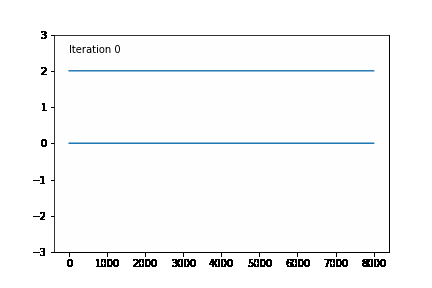

In [50]:
import base64
b64 = base64.b64encode(open("animation.gif",'rb').read()).decode('ascii')
display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))